In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools

In [3]:
np.random.seed(42)

# Simple Neural Network

## Description ...

In [4]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        
        self.W1 = np.random.rand(input_size, hidden_size) 
        self.W2 = np.random.rand(hidden_size, output_size)
        
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        
    def feedforward(self, X, sigma, outsigma):
        
        A0 = X
        
        self.Z1 = np.dot(A0, self.W1) + self.b1
        self.A1 = sigma(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = outsigma(self.Z2)
        
        return self.A2
        
    def backprop(self, X, y, d_sigma, d_outsigma, d_loss, alpha=1):
        A0 = X
        m = X.shape[0]

        d_Z2 = d_loss(self.A2, y) * d_outsigma(self.Z2)
        
        self.d_W2 = (1/m) * np.dot(self.A1.T, d_Z2)
        self.d_b2 = (1/m) * np.sum(d_Z2, axis=0, keepdims=True)
        
        d_Z1 = np.dot(d_Z2, self.W2.T) * d_sigma(self.Z1)
        
        self.d_W1 = (1/m) * np.dot(A0.T, d_Z1)
        self.d_b1 = (1/m) * np.sum(d_Z1, axis=0, keepdims=True)
    
        self.W1 -= alpha * self.d_W1
        self.W2 -= alpha * self.d_W2
        
        self.b1 -= alpha * self.d_b1
        self.b2 -= alpha * self.d_b2
      
    def train(self, X, y, sigma, d_sigma, outsigma, d_outsigma, cost, d_cost):
        y_hat = self.feedforward(X, sigma, outsigma)
        loss_error = cost(y_hat, y)
        self.backprop(X, y, d_sigma, d_outsigma, d_cost)
        return y_hat, loss_error
    
    # gradient check (in process...)
    def gradient_check_W1(self, X, y, sigma, outsigma, cost, epsilon = 1e-7):
        gradapprox = np.zeros(self.W1.shape)
        saved_W1 = self.W1
            
        for i in range(self.W1.shape[0]):
            for j in range(self.W1.shape[1]):
        
                self.W1[i][j] = self.W1[i][j] + epsilon                                   
                y_hat = self.feedforward(X, sigma, outsigma)
                J_plus = cost(y_hat, y)
                
                self.W1 = saved_W1
                self.W1[i][j] = self.W1[i][j] - epsilon    
                y_hat = self.feedforward(X, sigma, outsigma)
                J_minus = cost(y_hat, y)
            
                gradapprox[i][j] = (J_plus - J_minus) / (2 * epsilon)
                self.W1 = saved_W1
            
        rel_error = lambda x, y: np.max(np.abs(x - y) / (np.maximum(epsilon, np.abs(x) + np.abs(y))))
        diff = rel_error(self.d_W1, gradapprox)
        return diff

## Activation Function

Example of an activation function.
Sigmoid is used for classification problems.

$$ S(x)= \frac{1}{1+e^{-x}} $$

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

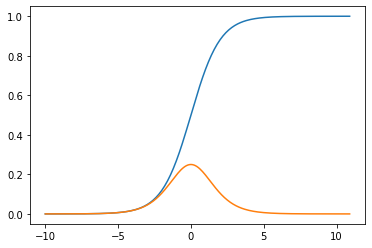

In [6]:
x = np.arange(-10, 11, 0.1)
y = sigmoid(x)
y_prim = sigmoid_derivative(x)
plt.plot(x, y)
plt.plot(x, y_prim)
plt.show()

## Loss Function

In [7]:
def mse(y_hat, y):
    return np.mean(np.square(y_hat - y))
    
def mse_derivative(y_hat, y):
    return 2*(y_hat - y)

In [8]:
X=np.array(([0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

input_size = X.shape[1]
hidden_size = 4
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)
for i in range(2001): 
    y_hat, loss = nn.train(X, y, 
                    sigmoid, sigmoid_derivative, 
                    sigmoid, sigmoid_derivative, 
                    mse, mse_derivative)
    if i % 100 == 0: 
        print (f"for iteration #{str(i)}: {str(loss)}")
    
print ("Final predicted Output: \n" + str(y_hat))

# gradient check ...still in process...
diff = nn.gradient_check_W1(X, y, sigmoid, sigmoid, mse)
print("diff gradients W1:", diff)

for iteration #0: 0.3034121023914269
for iteration #100: 0.24949726217102802
for iteration #200: 0.24859873511872313
for iteration #300: 0.24670281346083678
for iteration #400: 0.24177142927212003
for iteration #500: 0.22816783629520693
for iteration #600: 0.20177533851279858
for iteration #700: 0.17139187894855415
for iteration #800: 0.11890103413391276
for iteration #900: 0.05584989835587927
for iteration #1000: 0.02712416144613057
for iteration #1100: 0.016029755273693366
for iteration #1200: 0.010887727042911112
for iteration #1300: 0.008074571757056165
for iteration #1400: 0.006344925667240902
for iteration #1500: 0.005190301733060776
for iteration #1600: 0.004371927370497184
for iteration #1700: 0.0037650557808261214
for iteration #1800: 0.003298930595020912
for iteration #1900: 0.0029307393543436828
for iteration #2000: 0.0026331972739928157
Final predicted Output: 
[[0.04876148]
 [0.96172776]
 [0.93937381]
 [0.05490727]]
diff gradients W1: 0.3338338690773149


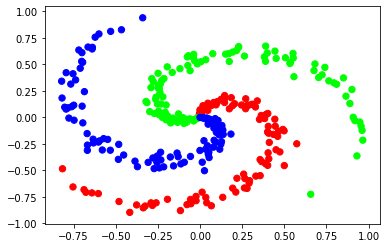

In [9]:
N = 100 # the number of points per class
D = 2 # the dimensionality (x, y coordinates)
C = 3 # the number of classes

X = np.zeros((N*C, D)) # data matrix (each row = single example)
y = np.zeros((N*C, C), dtype='uint8') # class labels
for j in range(C):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0, 1, N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = np.zeros(C) # y should be one-hot encoded
  y[ix, j] = 1
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [10]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    dx = lambda t: 1 if t > 0 else 0
    return np.vectorize(dx)(x)
    
def softmax(a, y, N):
    s = np.exp(a) / np.sum(np.exp(a), axis=1, keepdims=True)
    return s

def cross_entropy(p, q, y, N): 
    #pp = p[range(N),y]
    return - p * np.log(q+0.001) + 0.001

def softmax_derivative(x):
    return 1

def cross_entropy_derivative(y_hat, y, N):
    #yhat = y_hat[range(N), y]
    return y_hat - y

In [11]:
h = 100
nn2 = NeuralNetwork(D, h, 3)
for i in range(3001):

    y_hat, loss = nn2.train(X, y, 
              relu, relu_derivative, 
              functools.partial(softmax, y = y, N = X.shape[0]), softmax_derivative,
              functools.partial(cross_entropy, y = y, N = X.shape[0]), 
              functools.partial(cross_entropy_derivative, N = X.shape[0]))
    if i % 100 == 0: 
        print (f"for iteration #{str(i)}: {str(np.sum(loss))}")

for iteration #0: 1453.9256672347642
for iteration #100: 550.1494095478944
for iteration #200: 380.6714468462043
for iteration #300: 243.89266793809927
for iteration #400: 186.8767958589438
for iteration #500: 152.8157604897175
for iteration #600: 131.0439174063219
for iteration #700: 115.33705328839122
for iteration #800: 104.48611129307304
for iteration #900: 96.09742915694554
for iteration #1000: 89.36581849809781
for iteration #1100: 83.83483114275313
for iteration #1200: 79.1463628694993
for iteration #1300: 75.14128360081271
for iteration #1400: 71.66356769527329
for iteration #1500: 68.6057104875319
for iteration #1600: 65.85287336845583
for iteration #1700: 63.44568211133084
for iteration #1800: 61.28904481278633
for iteration #1900: 59.34844269988997
for iteration #2000: 57.58082657325133
for iteration #2100: 55.95876764319314
for iteration #2200: 54.49470204213921
for iteration #2300: 53.13928527942029
for iteration #2400: 51.88375890477673
for iteration #2500: 50.70388155492

In [12]:
scores = nn2.Z2
predicted_classes = np.argmax(scores, axis=1)
y_classes =  np.argmax(np.array(y), axis=1)
print (f"training accuracy: {np.mean(predicted_classes == y_classes)}")

training accuracy: 0.9933333333333333


(-0.9980227418935854, 1.0219772581064164)

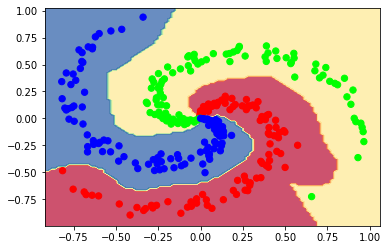

In [13]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
input_dots = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(np.maximum(0, np.dot(input_dots, nn2.W1) + nn2.b1), nn2.W2) + nn2.b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

Bibliography:
  
1. Softmax
    * https://deepnotes.io/softmax-crossentropy
    * https://aimatters.wordpress.com/2019/06/17/the-softmax-function-derivative/
    * https://aimatters.wordpress.com/2020/06/14/derivative-of-softmax-layer/
    
2. Entropy/ Cross-Entropy
    * https://www.youtube.com/watch?v=ErfnhcEV1O8
    * https://machinelearningmastery.com/cross-entropy-for-machine-learning/
    * https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

3. Neural Network:
    * https://cs231n.github.io/neural-networks-case-study/
    * https://cs231n.github.io/
    * https://github.com/tyz910
    * http://cs231n.stanford.edu/handouts/linear-backprop.pdf
    * https://datascience-enthusiast.com/DL/Improving_DeepNeural_Networks_Gradient_Checking.html
    * https://peterroelants.github.io/
    
4. Numpy axis:
    * https://i.stack.imgur.com/Z29Nn.jpg